In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
from pathlib import Path

%matplotlib inline

nu = 0.02, uc = 2.500000e-02
slip = 4.282680e-04


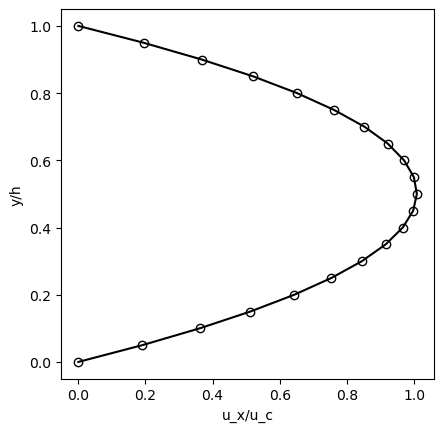

In [2]:
j = None
with open(Path('data/poiseuille.json'), mode='r') as f:
    j = json.load(f)

gx = j["externalForce"][0]
tau = j["relaxationTime"]
ny = j["gridShape"][1]
nu = (tau - 0.5) / 3.0
h = float((ny - 1))
uc = gx*h**2/(8.0*nu)
y = np.linspace(0, h, ny)/h
print(f"nu = {nu:.2f}, uc = {uc:.6e}")

ux = np.loadtxt(Path(j["outputDirectory"]) / Path("ux.txt"))
x = ux/uc
slip = ux[0]/uc
print(f"slip = {slip:.6e}")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, "-o", color="k", fillstyle="none")
ax.set_xlabel("u_x/u_c")
ax.set_ylabel("y/h")
ax.set_aspect('equal')

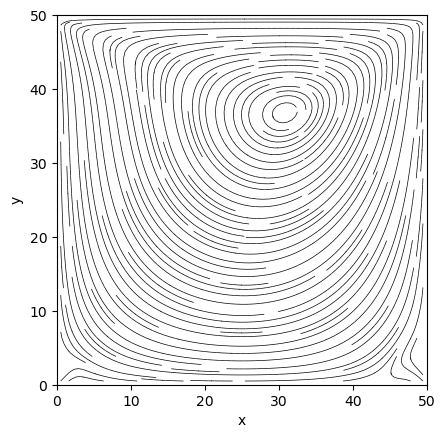

In [11]:
j = None
with open(Path('data/cavity.json'), mode='r') as f:
    j = json.load(f)

nx = j["gridShape"][0]
ny = j["gridShape"][1]
lx = float(nx - 2)
ly = float(ny - 2)

x = np.linspace(0, float(nx) - 1, nx) - 0.5
y = np.linspace(0, float(ny) - 1, ny) - 0.5
xv, yv = np.meshgrid(x, y)

ux = np.loadtxt(Path(j["outputDirectory"]) / Path("ux.txt"))
uy = np.loadtxt(Path(j["outputDirectory"]) / Path("uy.txt"))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.streamplot(xv[1:-1, 1:-1], yv[1:-1, 1:-1], ux[1:-1, 1:-1], uy[1:-1, 1:-1],
              density=2, color="k", arrowstyle="-", linewidth=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xbound([0, lx])
ax.set_ybound([0, ly])
ax.set_aspect('equal')